In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import statsmodels
from pylab import rcParams

In [13]:
df = pd.read_csv('C:/Users/SURBHI/Downloads/Sparkling.csv')
#1. Read the data as an appropriate Time Series data, share data insights and plot the data

In [14]:
round(df.describe(),3)

,Sparkling
count,187.000
mean,2402.417
std,1295.112
min,1070.000
25%,1605.000
50%,1874.000
75%,2549.000
max,7242.000


In [15]:
df.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [16]:
date = pd.date_range(start='1980-01', end='1995-07', freq='Q')

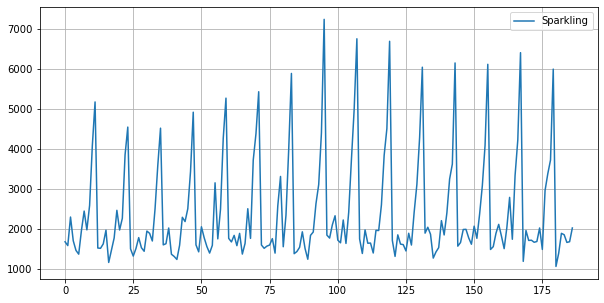

In [17]:
rcParams['figure.figsize'] = 10,5
df.plot()
plt.grid()

In [18]:
df['Sparkling'].mean()

2402.4171122994653

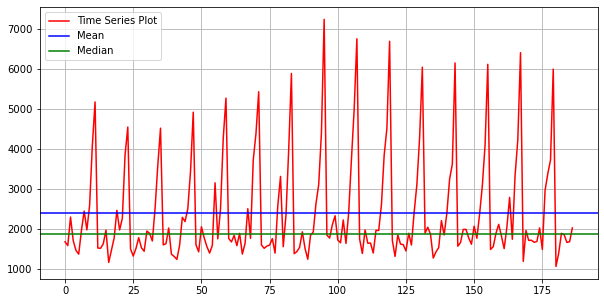

In [19]:
df.plot(color='Red')
plt.axhline(df['Sparkling'].mean(),color='Blue')
plt.axhline(df['Sparkling'].median(),color='Green')

plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

In [20]:
df.columns

Index(['YearMonth', 'Sparkling'], dtype='object')

In [21]:
from datetime import datetime

In [22]:
date = []
for i in df['YearMonth']:
    date.append(datetime.strptime(i, '%Y-%m'))

In [23]:
df['YearMonth'] = date

In [24]:
df["YearMonth"][0]

Timestamp('1980-01-01 00:00:00')

In [25]:
df.set_index('YearMonth', inplace=True)

In [26]:
df

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
...,...
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670


C:\Users\SURBHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


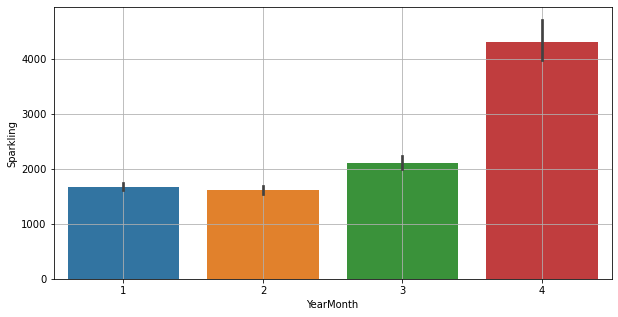

In [27]:
sns.barplot(df.index.quarter,df.Sparkling,data=df)
plt.grid();

Trend 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
                ...   
1995-03-01    0.757440
1995-04-01    0.730351
1995-05-01    0.660609
1995-06-01    0.603468
1995-07-01    0.809164
Name: seasonal, Length: 187, dtype: float64 

Residual 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64 



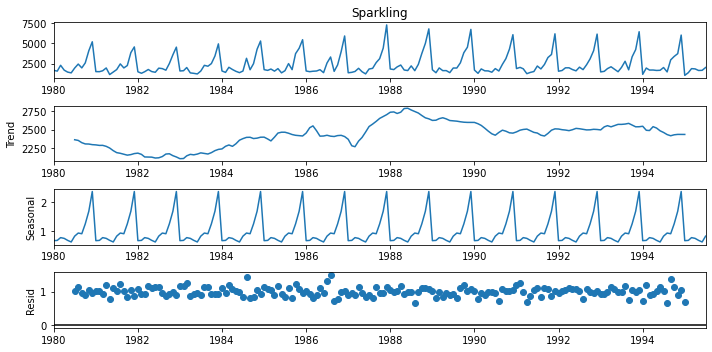

In [28]:
#2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition. Share insights

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df["Sparkling"] , model='multiplicative')

decomposition.plot();
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid
print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

(137, 1)
(38, 1)
First few rows of Training Data


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


Last few rows of Training Data


,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


First few rows of Test Data


,Sparkling
YearMonth,
1992-06-01,1625
1992-07-01,2076
1992-08-01,1773
1992-09-01,2377
1992-10-01,3088


Last few rows of Test Data


,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


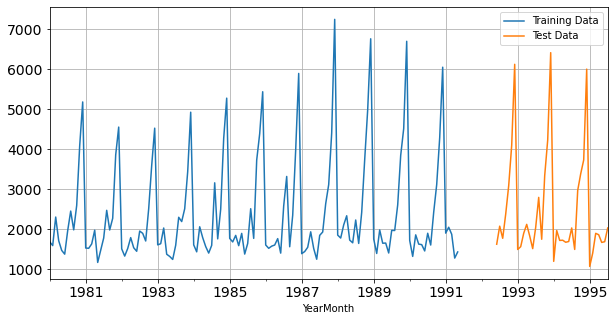

In [29]:
#3. Split the data into training and test. The test data should start from 1991.
from matplotlib import pyplot as plt
import matplotlib
train    =   df[0:int(len(df)*0.735)] 
test     =   df[int(len(df)*0.8):]
print(train.shape)
print(test.shape)
from IPython.display import display
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())
train['Sparkling'].plot(fontsize=14)
test['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137]
Test Time instance 
 [256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293]
First few rows of Training Data


,Sparkling,time
YearMonth,,
1980-01-01,1686,1
1980-02-01,1591,2
1980-03-01,2304,3
1980-04-01,1712,4
1980-05-01,1471,5


Last few rows of Training Data


,Sparkling,time
YearMonth,,
1991-01-01,1902,133
1991-02-01,2049,134
1991-03-01,1874,135
1991-04-01,1279,136
1991-05-01,1432,137


First few rows of Test Data


,Sparkling,time
YearMonth,,
1992-06-01,1625,256
1992-07-01,2076,257
1992-08-01,1773,258
1992-09-01,2377,259
1992-10-01,3088,260


Last few rows of Test Data


,Sparkling,time
YearMonth,,
1995-03-01,1897,289
1995-04-01,1862,290
1995-05-01,1670,291
1995-06-01,1688,292
1995-07-01,2031,293


For RegressionOnTime forecast on the Test Data,  RMSE is 1541.047 


,Test RMSE
RegressionOnTime,1541.047208


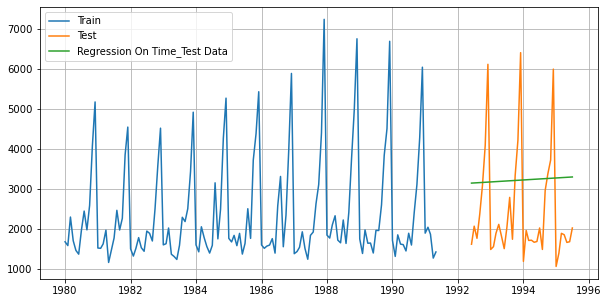

In [30]:
#4. Build given timeseries models on the training data and evaluate the model using RMSE on the test data.
# Models to be built-regression,naïve forecast models, simple average models, moving average and triple exponential smoothing. 
# Share suitable plots for all models

#Model 1: Linear Regression
train_time = [i+1 for i in range(len(train))]
test_time = [i+256 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

#Model Evaluation
from sklearn import metrics
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 1678.319


,Test RMSE
RegressionOnTime,1541.047208
NaiveModel,1678.318559


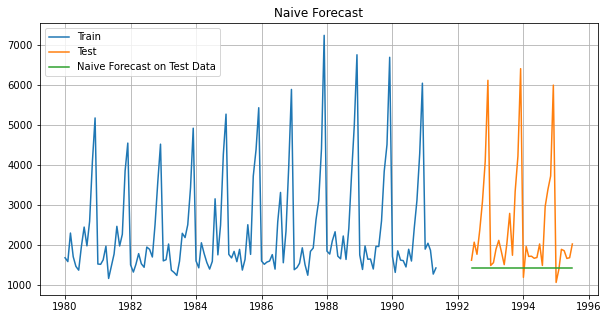

In [31]:
#Model 2: Naive Approach: y^t+1=yt
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()
train.tail()
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#Model Evaluation
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

For Simple Average forecast on the Test Data,  RMSE is 1331.600


,Test RMSE
RegressionOnTime,1541.047208
NaiveModel,1678.318559
SimpleAverageModel,1331.600369


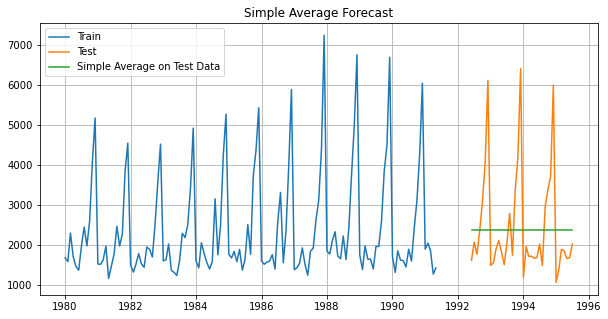

In [32]:
#Method 3: Simple Average
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#Model Evaluation
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 805.880
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1161.283
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1290.625
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1375.582


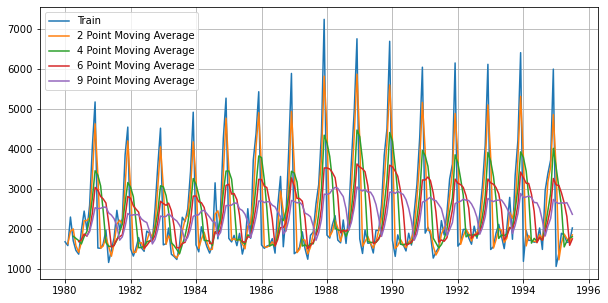

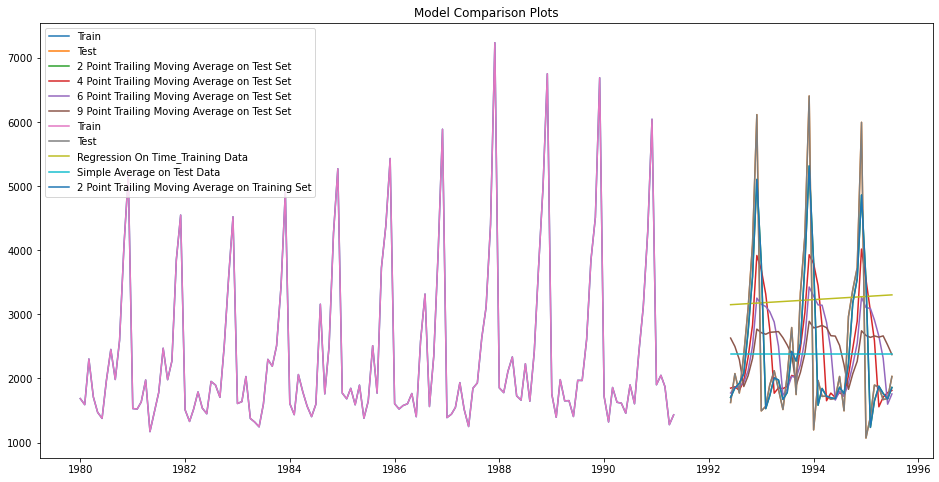

In [33]:
#Method 4: Moving Average(MA)
MovingAverage = df.copy()
MovingAverage.head()

#Trailing moving averages
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.735)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.8):]

## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

#Model Evaluation

## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

## Plotting on both Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

#plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

C:\Users\SURBHI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


==Holt Winters model Exponential Smoothing Estimated Parameters ==
{'smoothing_level': 0.07598820397342766, 'smoothing_trend': 0.0325792414819378, 'smoothing_seasonal': 0.4789752379691614, 'damping_trend': nan, 'initial_level': 2356.526256118298, 'initial_trend': -0.32058800837889834, 'initial_seasons': array([-636.24560693, -722.99357661, -398.62922711, -473.44613099,
       -808.44500538, -815.36749518, -384.23763385,   72.99901718,
       -237.46097873,  272.31856857, 1541.40125345, 2590.09340543]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
==Holt model Exponential Smoothing Estimated Parameters ==
{'smoothing_level': 0.07608107368672068, 'smoothing_trend': 0.06913716557406575, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1505.25085963567, 'initial_trend': 6.168860373182611, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\SURBHI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SURBHI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\SURBHI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SURBHI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Test RMSE
RegressionOnTime,1541.047208
NaiveModel,1678.318559
SimpleAverageModel,1331.600369
2pointTrailingMovingAverage,805.879970
4pointTrailingMovingAverage,1161.282792
6pointTrailingMovingAverage,1290.624831
9pointTrailingMovingAverage,1375.582351
"Alpha=0.25,Beta=0.25,Gamma=0.50:TES",359.780714


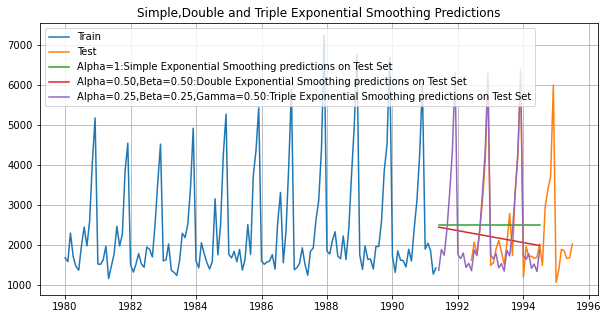

In [34]:
#Holt-Winters - ETS(A, A, A) - Holt Winter's linear method
# Initializing the Double Exponential Smoothing Model
import statsmodels.tools.eval_measures as em
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import  mean_squared_error

model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit()
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')

print(model_TES.params)
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

## Plotting the Training data, Test data and the forecasted values
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')
model_SES_autofit = model_SES.fit(optimized=True)
SES_predict = model_SES_autofit.forecast(steps=len(test))

model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('==Holt model Exponential Smoothing Estimated Parameters ==')

print(model_DES.params)
DES_predict =  model_DES.forecast(len(test))
DES_predict

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.50,Beta=0.50:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.25,Gamma=0.50:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

#print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))
#print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))
#print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))

resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.25,Gamma=0.50:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf


In [26]:
#5. Build a table (create a data frame) with all the models built along the respective RMSE values on the test data.


In [35]:
models = ['Linear Regression','Naive Approach','Simple Average','Moving Average','Holt-Winters' ]
rmse = [1541.047, 1678.319, 1331.600, 805.880, 359.7807]

model_df = pd.DataFrame()
model_df['models'] = models
model_df['rmse'] = rmse
model_df

,models,rmse
0,Linear Regression,1541.0470
1,Naive Approach,1678.3190
2,Simple Average,1331.6000
3,Moving Average,805.8800
4,Holt-Winters,359.7807


In [28]:
#6. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future.

In [36]:
# df = pd.read_csv('C:/Users/SURBHI/Downloads/Sparkling.csv')
# df

In [36]:
train = df.loc[:"1994-05-01"]

In [37]:
test = df.loc["1994-06-01":]

C:\Users\SURBHI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


==Holt Winters model Exponential Smoothing Estimated Parameters ==
{'smoothing_level': 0.07569410199363809, 'smoothing_trend': 0.032431681564090216, 'smoothing_seasonal': 0.41069311060243374, 'damping_trend': nan, 'initial_level': 2356.5062785042064, 'initial_trend': -0.7861354228881012, 'initial_seasons': array([-636.24921101, -722.99696525, -398.65654898, -473.44996703,
       -808.436198  , -815.36648026, -384.24396004,   73.00043411,
       -237.46114314,  272.33400146, 1541.39188134, 2590.0993018 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
==Holt model Exponential Smoothing Estimated Parameters ==
{'smoothing_level': 0.0757142857142857, 'smoothing_trend': 0.06194805194805194, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\SURBHI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SURBHI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\SURBHI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SURBHI\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Test RMSE
RegressionOnTime,1541.047208
NaiveModel,1678.318559
SimpleAverageModel,1331.600369
2pointTrailingMovingAverage,805.879970
4pointTrailingMovingAverage,1161.282792
6pointTrailingMovingAverage,1290.624831
9pointTrailingMovingAverage,1375.582351
"Alpha=0.25,Beta=0.25,Gamma=0.50:TES",359.780714
"Alpha=0.25,Beta=0.25,Gamma=0.50:TES",366.835454


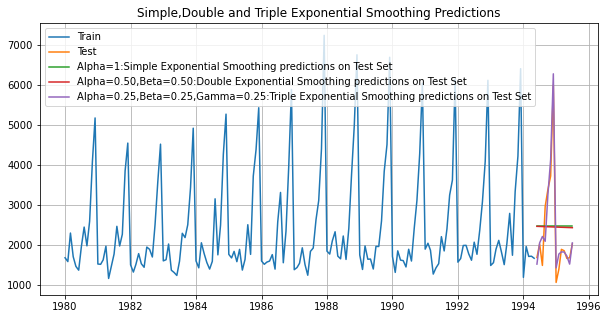

In [38]:
#Holt-Winters - ETS(A, A, A) - Holt Winter's linear method
# Initializing the Double Exponential Smoothing Model
import statsmodels.tools.eval_measures as em
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import  mean_squared_error

model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit()
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')

print(model_TES.params)
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

## Plotting the Training data, Test data and the forecasted values
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')
model_SES_autofit = model_SES.fit(optimized=True)
SES_predict = model_SES_autofit.forecast(steps=len(test))

model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('==Holt model Exponential Smoothing Estimated Parameters ==')

print(model_DES.params)
DES_predict =  model_DES.forecast(len(test))
DES_predict

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.50,Beta=0.50:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.25,Gamma=0.25:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

#print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))
#print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))
#print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))

resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.25,Gamma=0.50:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf
